In [39]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.linear_model import LinearRegression,RANSACRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import statsmodels.api as sm
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import ElasticNetCV

In [40]:
#Loading of dataset
credit=pd.read_csv("C:\\Users\\Neel\\Desktop\\Greyatom Codes\\Practice Datasets\\Credit.csv")
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [41]:
#Checking shape of the dataset
credit.shape

(400, 12)

In [42]:
credit=credit.drop(["Unnamed: 0"],1)

In [43]:
#Checking data types for all columns of dataset
credit.dtypes

Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Gender        object
Student       object
Married       object
Ethnicity     object
Balance        int64
dtype: object

In [44]:
#Checking for Null(Missing) entries in the dataset
credit.isnull().sum()

Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
Balance      0
dtype: int64

In [45]:
credit["Student"]=credit["Student"].astype("category")
d=dict(enumerate(credit["Student"].cat.categories))
credit["Student"]=credit["Student"].cat.codes
print(d)

{0: 'No', 1: 'Yes'}


In [46]:
credit["Married"]=credit["Married"].astype("category")
d=dict(enumerate(credit["Married"].cat.categories))
credit["Married"]=credit["Married"].cat.codes
print(d)

{0: 'No', 1: 'Yes'}


In [47]:
#One Hot encoding for Categorical Data columns 
credit_1=pd.get_dummies(credit)

In [48]:
credit_1.head()

,Income,Limit,Rating,Cards,Age,Education,Student,Married,Balance,Gender_ Male,Gender_Female,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
0,14.891,3606,283,2,34,11,0,1,333,1,0,0,0,1
1,106.025,6645,483,3,82,15,1,1,903,0,1,0,1,0
2,104.593,7075,514,4,71,11,0,0,580,1,0,0,1,0
3,148.924,9504,681,3,36,11,0,0,964,0,1,0,1,0
4,55.882,4897,357,2,68,16,0,1,331,1,0,0,0,1


In [49]:
#Dropping logically unwanted columns
credit_1=credit_1.drop(["Gender_Female","Ethnicity_Asian"],1)

In [50]:
scaler=MinMaxScaler()

In [51]:
cols=list(credit_1)

In [52]:
#Scaling the dataset using MinMax Scaler
credit_scaled=pd.DataFrame(scaler.fit_transform(credit_1))

In [53]:
credit_scaled.columns=cols

## K-Nearest Neighbor (Regressor)

In [54]:
#Segregating columns as dependent variables and independent variables
X=credit_scaled.drop(["Balance"],1)
y=credit_1["Balance"]

In [55]:
#Train-Test splitting for KNN Regressor ModeL
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.3,random_state=0)

In [56]:
#Checking r2 score for different values of nearest neighbors
r2=[]
for i in range(3,12):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    r2.append(r2_score(y_test,y_pred))

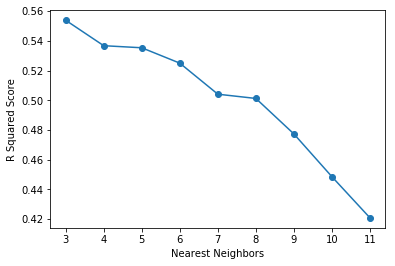

In [57]:
#Plotting graph of Nearest Neighbor vs r2 score
import matplotlib.pyplot as plt
x=np.arange(3,12)
plt.plot(x,r2,marker='o')
plt.xlabel("Nearest Neighbors")
plt.ylabel("R Squared Score")
plt.show()

In [58]:
#Checking r2 score for different distance metrics
metrics=["cosine","jaccard","manhattan","minkowski"]
r2m=[]
for i in range(4):
    knn=KNeighborsRegressor(metric=metrics[i])
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    r2m.append(r2_score(y_test,y_pred))

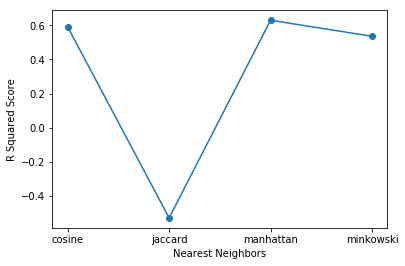

In [59]:
#Plotting graph of r2 score vs distance metrics 
plt.plot(metrics,r2m,marker='o')
plt.xlabel("Nearest Neighbors")
plt.ylabel("R Squared Score")
plt.show()

In [60]:
#Choice of final model based on above method
knn=KNeighborsRegressor(n_neighbors=3,metric='manhattan')
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
r2_score(y_test,y_pred)

0.65998921491700013

## Liner Regression (Using Correlation Heatmap)

In [61]:
#Checking correlation of Input variable with output 
credit_scaled.corr()

,Income,Limit,Rating,Cards,Age,Education,Student,Married,Balance,Gender_ Male,Ethnicity_African American,Ethnicity_Caucasian
Income,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.019632,0.035652,0.463656,0.010738,0.040132,-0.019701
Limit,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,-0.006015,0.031155,0.861697,-0.009397,0.036320,-0.003081
Rating,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,-0.002028,0.036751,0.863625,-0.008885,0.037598,-0.001070
Cards,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,-0.026164,-0.009695,0.086456,0.022658,0.000878,-0.005631
Age,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,-0.029844,-0.073136,0.001835,-0.004015,0.061169,-0.000822
Education,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,0.072085,0.048911,-0.008062,0.005049,0.013827,-0.037725
Student,0.019632,-0.006015,-0.002028,-0.026164,-0.029844,0.072085,1.000000,-0.076974,0.259018,-0.055034,0.001931,-0.048334
Married,0.035652,0.031155,0.036751,-0.009695,-0.073136,0.048911,-0.076974,1.000000,-0.005673,-0.012452,-0.102707,0.011418
Balance,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,0.259018,-0.005673,1.000000,-0.021474,0.013720,-0.003288
Gender_ Male,0.010738,-0.009397,-0.008885,0.022658,-0.004015,0.005049,-0.055034,-0.012452,-0.021474,1.000000,0.014288,0.009831


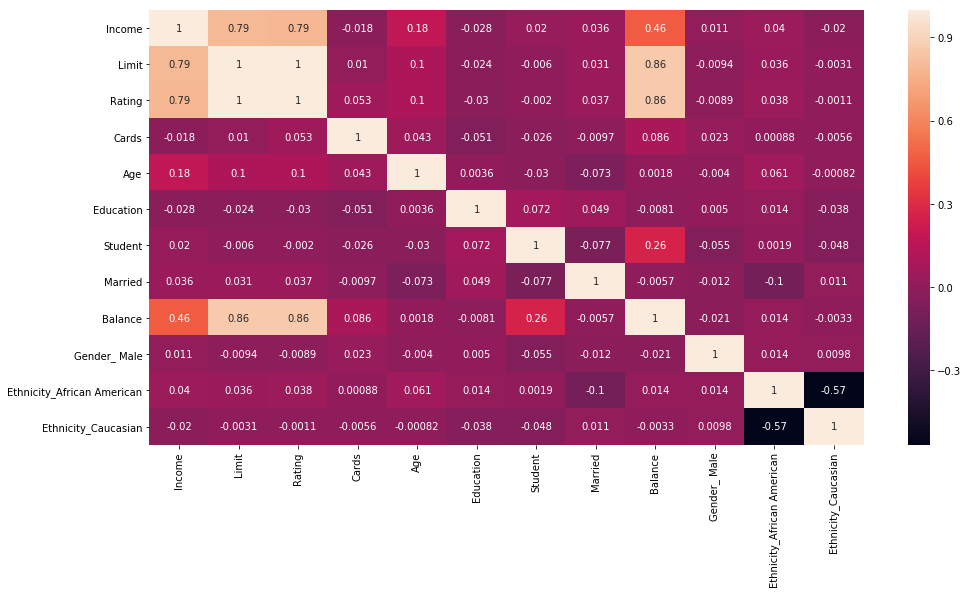

In [62]:
#Plotting correlation heatmap
plt.figure(figsize=(16,8))
sns.heatmap(credit_scaled.corr(),annot=True)
plt.show()

In [63]:
#Segregating required columns based correlation heatmap
X=credit_scaled[["Rating"]]
y=credit["Balance"]

In [64]:
#Train_Test splitting for Linear Regression Model
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.3,random_state=6)

In [65]:
lin_reg=LinearRegression()

In [66]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
y_pred=lin_reg.predict(X_test)

In [68]:
r2_score(y_test,y_pred)

0.77847840173890315

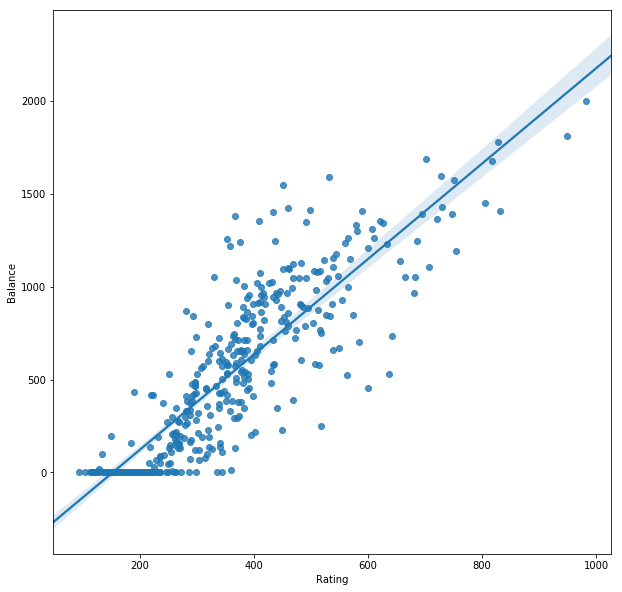

In [69]:
X = credit['Rating'].values.reshape(-1,1)
plt.figure(figsize=(10,10))
sns.regplot(X,y)
plt.xlabel('Rating')
plt.ylabel('Balance')
plt.show()

In [70]:
#Predicted values for entire Dataset
X=credit_scaled[["Rating"]]
y=credit["Balance"]
pred=lin_reg.predict(X)

In [71]:
#Residuals for entire Dataset
errors=list(y-pred)

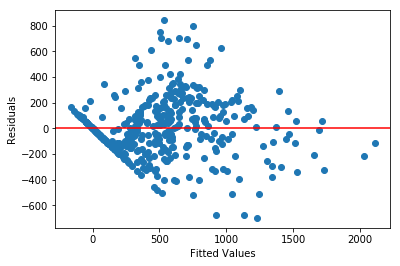

In [72]:
#Checking for homoscedasticity
plt.scatter(pred,errors)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.axhline(y=0,color='red')
plt.show()

## Linear Regression (Using Backward Elimination)

#### What does Standard error in a feature variable mean in linear regression? Is it the same as the weight of a feature (parameter)?
The standard error of the regression (S), also known as the standard error of the estimate, represents the average distance that the observed values fall from the regression line. Conveniently, it tells you how wrong the regression model is on average using the units of the response variable. Smaller values are better because it indicates that the observations are closer to the fitted line.
S must be <= 2.5 to produce a sufficiently narrow 95% prediction interval

#### What does regularization attempt to acheive?
1) Regularization reduces the variance of the model, without substantial increase in it's bias 

2) It tries to shrink co-efficient estimates to zero, this technique discourages learning a more complex or flexible model, so as to avoid the risk of overfitting.

In [75]:
X=credit_1.drop(["Balance"],1)
y=credit["Balance"]

In [76]:
#function to get important features using Backward Elimination
cols = list(X.columns)
pmax = 1
while (pmax>0.05):
    p=[]
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        breakselected_features_BE = cols
print("Best features using Backward Elimination: ",cols)

Best features using Backward Elimination:  ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Student']


In [186]:
X_BE=credit_scaled[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Student']]
y_BE=credit["Balance"]

In [187]:
X_train,X_test,y_train,y_test=tts(X_BE,y_BE,test_size=0.3,random_state=0)

In [188]:
linreg_BE=LinearRegression()

In [189]:
linreg_BE.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [190]:
y_pred=linreg_BE.predict(X_test)

In [191]:
r2_score(y_test,y_pred)

0.95598296381177161

In [192]:
pred=linreg_BE.predict(X_BE)

In [193]:
residuals=list(y_BE-pred)

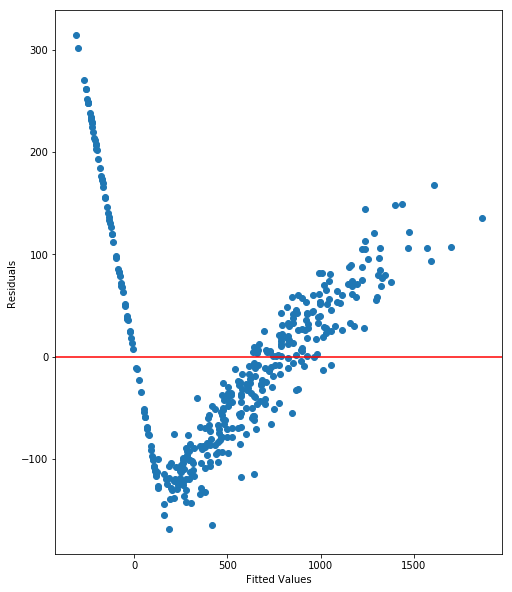

In [194]:
#Checking for homoscedasticity
plt.scatter(pred,residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.axhline(y=0,color='red')
plt.show()

## Linear Regression (Using Elastic Net)

In [195]:
#Initializing ELastic Net Regression Model
elastic_reg=ElasticNetCV()

In [196]:
#Division of Dependent and Independent variables 
X=credit_1.drop(["Balance"],1)
y=credit_1["Balance"]

In [197]:
elastic_reg.fit(X,y)

ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [198]:
#Score after using Elastic Net 
elastic_reg.score(X,y)

0.79841833042002097

In [199]:
#L1 ratio
print("Value of L1-ratio: ",elastic_reg.l1_ratio)

Value of L1-ratio:  0.5


In [200]:
elastic_reg.score

<bound method RegressorMixin.score of ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)>

In [201]:
coef=pd.Series(elastic_reg.coef_, index=X.columns)

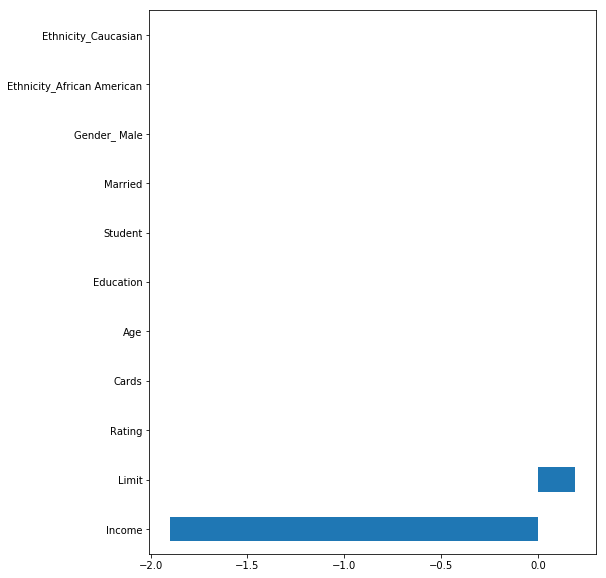

In [202]:
#Bar plot for important features 
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
coef.plot(kind='barh')
plt.show()

## RAndom SAmple Consensus (RANSAC Algorithm)

In [203]:
#Division Independent variables and Dependent variable (Target variable)
X=credit_1.drop(['Balance'],1)
y=credit_1["Balance"]

In [204]:
#Initialize Normal Linear Regression Model
linreg=LinearRegression()

In [205]:
linreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [206]:
#Score of Normal Linear Regression Model
linreg.score(X,y)

0.95510156336517582

In [207]:
#Intercept of Normal Linear Regression Line
linreg.intercept_

-473.05693908073829

In [208]:
#Co-efficients of all independent variables
linreg.coef_

array([ -7.80310179e+00,   1.90906737e-01,   1.13652652e+00,
         1.77244836e+01,  -6.13908824e-01,  -1.09885532e+00,
         4.25747360e+02,  -8.53390061e+00,   1.06532477e+01,
        -1.68041792e+01,  -6.69715400e+00])

In [209]:
#Initializing RANSAC Linear Regression Model
ransac=RANSACRegressor(LinearRegression())

In [210]:
ransac.fit(X,y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_skips=inf, max_trials=100, min_samples=None, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [211]:
y_pred=ransac.predict(X)

In [212]:
#Co-efficients of Independent Variables using RANSAC Regressor
ransac.estimator_.coef_

array([ -8.54575588e+00,   2.83504975e-01,   8.59461608e-02,
         2.17677399e+01,  -9.47643162e-01,   6.96698480e-02,
         4.52103227e+02,  -1.64543371e+01,   1.27789379e+01,
        -2.05634437e+01,  -4.90034858e+00])

In [213]:
#Intercept of RANSAC regression line
ransac.estimator_.intercept_

-533.72106260597923

In [214]:
#Score using RANSAC Regression Model
r2_score(y,y_pred)

0.94613548366055911

In [215]:
#False in outupt ndarray depicts outliers 
ransac.inlier_mask_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True, False,  True,  True,
        True,  True,

### Conclusion from RANSAC Algorithm
1) There are few outliers in dataset

2) Those outliers impact the line of Best fit, therefore after application of RANSAC algorithm the intercept and coefficient values of independent variables have changed a bit.

### What is the difference between Stochastic, Batch and Mini-Batch Gradient Descent?
a) Batch Gradient Descent: As we need to calculate the gradient on the whole dataset to perform just one update, batch gradient descent can be very slow and is intractable for datasets that don’t fit in memory.

    i) If you have 300,000,000 records you need to read in all the records into memory from disk because you can’t store them all in memory.
    
    ii) After calculating sigma for one iteration, we move one step.
    iii)Then repeat for every step.
    
    iv) This means it take a long time to converge.
    
    v) Especially because disk I/O is typically a system bottleneck anyway, and this will inevitably require a huge number of reads.

b) Stochastic Gradient Descent: Batch Gradient Descent turns out to be a  slower algorithm. So, for faster computation, we prefer to use stochastic gradient descent. The first step of algorithm is to randomize the whole training set. Then, for updation of every parameter we use only one training example in every iteration to compute the gradient of cost function. As it uses one training example in every iteration this algo is faster for larger data set. In SGD, one might not achieve accuracy, but the computation of results are faster.

    i) In the inner loop:
    
    ii)Taking first step: pick first training example and update the parameter using this example, then for second example and so on
    
    iii) Taking second step: pick second training example and update the parameter using this example, and so on for ‘ m ‘.
    Now take third … n steps in algorithm.
    Until we reach minimum.
    
c) Mini-Batch Gradient Descent: Mini batch algorithm is the most favorable and widely used algorithm that makes precise and faster results using a batch of ‘ m ‘  training examples. In mini batch algorithm rather than using  the complete data set, in every iteration we use a set of ‘m’ training examples called batch to compute the gradient of the cost function. Common mini-batch sizes range between 50 and 256, but can vary for different applications.

For better understanding please visit: https://www.hackerearth.com/blog/developers/3-types-gradient-descent-algorithms-small-large-data-sets/